In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

from sklearn import tree #决策树
from sklearn.tree import DecisionTreeClassifier #分类树
from sklearn.model_selection  import train_test_split#测试集和训练集
from sklearn.pipeline import Pipeline #管道
from sklearn.feature_selection import SelectKBest #特征选择
from sklearn.feature_selection import chi2 #卡方统计量

from sklearn.preprocessing import MinMaxScaler  #数据归一化
from sklearn.decomposition import PCA #主成分分析
from sklearn.model_selection import GridSearchCV #网格搜索交叉验证，用于选择最优的参数

In [57]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [5]:
#读取数据
path = './dataCSV/iris.data'  
data = pd.read_csv(path, header=None)
print(data)
x=data[list(range(4))]#获取X变量
y=pd.Categorical(data[4]).codes#把Y转换成分类型的0,1,2
print("总样本数目：%d;特征属性数目:%d" % x.shape)
print(x)
y

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
总样本数目：150;特征属性数目:4
       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [6]:
x

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [8]:
data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#数据进行分割（训练数据和测试数据）
# x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=1000)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size = 0.8, random_state=100)


In [36]:
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print(x_train)
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0])) # shape[0] 列数 shape[1] 行数
## 因为需要体现以下是分类模型，因为DecisionTreeClassifier是分类算法，要求y必须是int类型
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)

       0    1    2    3
81   5.5  2.4  3.7  1.0
99   5.7  2.8  4.1  1.3
119  6.0  2.2  5.0  1.5
12   4.8  3.0  1.4  0.1
16   5.4  3.9  1.3  0.4
..   ...  ...  ...  ...
87   6.3  2.3  4.4  1.3
103  6.3  2.9  5.6  1.8
67   5.8  2.7  4.1  1.0
24   4.8  3.4  1.9  0.2
8    4.4  2.9  1.4  0.2

[120 rows x 4 columns]
训练数据集样本数目：120, 测试数据集样本数目：30


In [16]:
y_train

array([1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 0])

In [38]:
#数据标准化
#StandardScaler (基于特征矩阵的列，将属性值转换至服从正态分布)
#标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下
#常用与基于正态分布的算法，比如回归

#数据归一化
#MinMaxScaler （区间缩放，基于最大最小值，将数据转换到0,1区间上的）
#提升模型收敛速度，提升模型精度
#常见用于神经网络

#Normalizer （基于矩阵的行，将样本向量转换为单位向量）
#其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准
#常见用于文本分类和聚类、logistic回归中也会使用，有效防止过拟合

ss = MinMaxScaler()
#用标准化方法对数据进行处理并转换
## scikit learn中模型API说明：
### fit: 模型训练；基于给定的训练集(X,Y)训练出一个模型；该API是没有返回值；eg: ss.fit(X_train, Y_train)执行后ss这个模型对象就训练好了
### transform：数据转换；使用训练好的模型对给定的数据集(X)进行转换操作；一般如果训练集进行转换操作，那么测试集也需要转换操作；这个API只在特征工程过程中出现
### predict: 数据转换/数据预测；功能和transform一样，都是对给定的数据集X进行转换操作，只是transform中返回的是一个新的X, 而predict返回的是预测值Y；这个API只在算法模型中出现
### fit_transform: fit+transform两个API的合并，表示先根据给定的数据训练模型(fit)，然后使用训练好的模型对给定的数据进行转换操作

print("\n=================================================\n")
x_train = ss.fit_transform(x_train)
print(x_train)
x_test = ss.transform(x_test)
print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)



[[0.33333333 0.18181818 0.47368421 0.375     ]
 [0.38888889 0.36363636 0.54385965 0.5       ]
 [0.47222222 0.09090909 0.70175439 0.58333333]
 [0.13888889 0.45454545 0.07017544 0.        ]
 [0.30555556 0.86363636 0.05263158 0.125     ]
 [0.58333333 0.54545455 0.61403509 0.58333333]
 [0.22222222 0.81818182 0.10526316 0.04166667]
 [0.33333333 0.22727273 0.52631579 0.5       ]
 [0.55555556 0.63636364 0.80701754 0.95833333]
 [0.41666667 0.36363636 0.71929825 0.95833333]
 [0.05555556 0.13636364 0.05263158 0.08333333]
 [0.33333333 0.27272727 0.59649123 0.45833333]
 [0.77777778 0.45454545 0.85964912 0.83333333]
 [0.80555556 0.72727273 0.89473684 1.        ]
 [0.16666667 0.5        0.0877193  0.        ]
 [0.08333333 0.63636364 0.07017544 0.08333333]
 [0.19444444 0.45454545 0.10526316 0.04166667]
 [0.22222222 0.77272727 0.0877193  0.125     ]
 [0.41666667 0.27272727 0.52631579 0.45833333]
 [0.16666667 0.5        0.0877193  0.        ]
 [0.22222222 0.59090909 0.12280702 0.16666667]
 [0.1944444

In [39]:
#特征选择：从已有的特征中选择出影响目标值最大的特征属性
#常用方法：{ 分类：F统计量、卡方系数，互信息mutual_info_classif
        #{ 连续：皮尔逊相关系数 F统计量 互信息mutual_info_classif
#SelectKBest（卡方系数）

#在当前的案例中，使用SelectKBest这个方法从4个原始的特征属性，选择出来3个
ch2 = SelectKBest(chi2,k=3)
#K默认为10
#如果指定了，那么就会返回你所想要的特征的个数

x_train = ch2.fit_transform(x_train, y_train)#训练并转换
print(x_train)
x_test = ch2.transform(x_test)#转换

select_name_index = ch2.get_support(indices=True)
print ("对类别判断影响最大的三个特征属性分布是:",ch2.get_support(indices=False))
print(select_name_index)

[[0.33333333 0.47368421 0.375     ]
 [0.38888889 0.54385965 0.5       ]
 [0.47222222 0.70175439 0.58333333]
 [0.13888889 0.07017544 0.        ]
 [0.30555556 0.05263158 0.125     ]
 [0.58333333 0.61403509 0.58333333]
 [0.22222222 0.10526316 0.04166667]
 [0.33333333 0.52631579 0.5       ]
 [0.55555556 0.80701754 0.95833333]
 [0.41666667 0.71929825 0.95833333]
 [0.05555556 0.05263158 0.08333333]
 [0.33333333 0.59649123 0.45833333]
 [0.77777778 0.85964912 0.83333333]
 [0.80555556 0.89473684 1.        ]
 [0.16666667 0.0877193  0.        ]
 [0.08333333 0.07017544 0.08333333]
 [0.19444444 0.10526316 0.04166667]
 [0.22222222 0.0877193  0.125     ]
 [0.41666667 0.52631579 0.45833333]
 [0.16666667 0.0877193  0.        ]
 [0.22222222 0.12280702 0.16666667]
 [0.19444444 0.03508772 0.04166667]
 [0.61111111 0.63157895 0.58333333]
 [1.         0.94736842 0.79166667]
 [0.5        0.68421053 0.70833333]
 [0.30555556 0.61403509 0.58333333]
 [0.58333333 0.75438596 0.75      ]
 [0.38888889 0.56140351 0.5 

In [50]:
#降维：对于数据而言，如果特征属性比较多，在构建过程中，会比较复杂，这个时候考虑将多维（高维）映射到低维的数据
#常用的方法：
#PCA：主成分分析（无监督）
#LDA：线性判别分析（有监督）类内方差最小，人脸识别，通常先做一次pca

pca = PCA(n_components=2)#构建一个pca对象，设置最终维度是2维
# #这里是为了后面画图方便，所以将数据维度设置了2维，一般用默认不设置参数就可以

x_train = pca.fit_transform(x_train)#训练并转换
x_test = pca.transform(x_test)#转换

In [51]:
#模型的构建
model = DecisionTreeClassifier(criterion='entropy',random_state=1)#另外也可选gini 
#模型训练
model.fit(x_train, y_train)
#模型预测
y_test_hat = model.predict(x_test) 

In [52]:
#模型结果的评估
y_test2 = y_test.reshape(-1)
print(y_test2)
print(y_test_hat)
result = (y_test2 == y_test_hat)

print ("准确率:%.2f%%" % (np.mean(result) * 100))
#实际可通过参数获取
print ("Score：", model.score(x_test, y_test))#准确率
print ("Classes:", model.classes_)
print("获取各个特征的权重:", end='')
print(model.feature_importances_)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2]
[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2]
准确率:96.67%
Score： 0.9666666666666667
Classes: [0 1 2]
获取各个特征的权重:[0.94614409 0.05385591]


In [63]:
#画图
N = 2 #横纵各采样多少个值
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] #测试点

y_show_hat = model.predict(x_show) #预测值

y_show_hat = y_show_hat.reshape(x1.shape)  #使之与输入的形状相同
print(y_show_hat.shape)
y_show_hat[0]

(2, 2)


array([0, 2])

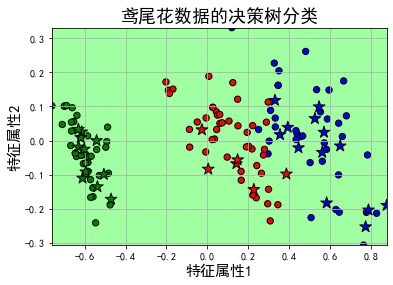

In [64]:
#画图
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
## 画一个区域图
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light) 
# 画测试数据的点信息
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
# 画训练数据的点信息
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'特征属性1', fontsize=15)
plt.ylabel(u'特征属性2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=18)
plt.show()

In [65]:
#参数优化
pipe = Pipeline([
            ('mms', MinMaxScaler()),
            ('skb', SelectKBest(chi2)),
            ('pca', PCA()),
            ('decision', DecisionTreeClassifier(random_state=0))
        ])

# 参数
parameters = {
    "skb__k": [1,2,3,4],
    "pca__n_components": [0.5,0.99],#设置为浮点数代表主成分方差所占最小比例的阈值，这里不建议设置为数值，思考一下？
    "decision__criterion": ["gini", "entropy"],
    "decision__max_depth": [1,2,3,4,5,6,7,8,9,10]
}
#数据
x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1
#模型构建：通过网格交叉验证，寻找最优参数列表， param_grid可选参数列表，cv：进行几折交叉验证
gscv = GridSearchCV(pipe, param_grid=parameters,cv=3)
#模型训练
gscv.fit(x_train2, y_train2)
#算法的最优解
print("最优参数列表:", gscv.best_params_)
print("score值：",gscv.best_score_)
print("最优模型:", end='')
print(gscv.best_estimator_)
#预测值
y_test_hat2 = gscv.predict(x_test2)

最优参数列表: {'decision__criterion': 'gini', 'decision__max_depth': 2, 'pca__n_components': 0.5, 'skb__k': 2}
score值： 0.9833333333333333
最优模型:Pipeline(memory=None,
         steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('skb',
                 SelectKBest(k=2,
                             score_func=<function chi2 at 0x0000018D9BDCC288>)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decision',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=2, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=

e:\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
#应用最优参数看效果
mms_best = MinMaxScaler()
skb_best = SelectKBest(chi2, k=3)
pca_best = PCA(n_components=0.99)
decision3 = DecisionTreeClassifier(criterion='gini', max_depth=4)
#构建模型并训练模型
x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = pca_best.fit_transform(skb_best.fit_transform(mms_best.fit_transform(x_train3), y_train3))
x_test3 = pca_best.transform(skb_best.transform(mms_best.transform(x_test3)))
decision3.fit(x_train3, y_train3)

print("正确率:", decision3.score(x_test3, y_test3))

正确率: 0.9666666666666667


1深度，测试集上正确率0.66667
1深度，训练集上正确率0.57778

2深度，测试集上正确率0.71429
2深度，训练集上正确率0.71111

3深度，测试集上正确率0.80000
3深度，训练集上正确率0.75556

4深度，测试集上正确率0.81905
4深度，训练集上正确率0.75556

5深度，测试集上正确率0.81905
5深度，训练集上正确率0.71111

6深度，测试集上正确率0.85714
6深度，训练集上正确率0.66667

7深度，测试集上正确率0.85714
7深度，训练集上正确率0.66667

8深度，测试集上正确率0.85714
8深度，训练集上正确率0.66667

9深度，测试集上正确率0.86667
9深度，训练集上正确率0.71111

10深度，测试集上正确率0.86667
10深度，训练集上正确率0.71111

11深度，测试集上正确率0.86667
11深度，训练集上正确率0.71111

12深度，测试集上正确率0.86667
12深度，训练集上正确率0.71111

13深度，测试集上正确率0.86667
13深度，训练集上正确率0.71111

14深度，测试集上正确率0.86667
14深度，训练集上正确率0.71111



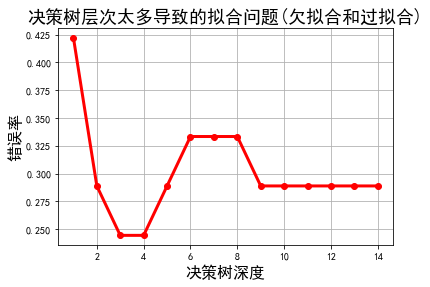

In [68]:
#基于原始数据前3列比较一下决策树在不同深度的情况下错误率
### TODO: 将模型在训练集上的错误率也画在图中
x_train4, x_test4, y_train4, y_test4 = train_test_split(x.iloc[:, :2], y, train_size=0.7, random_state=14)

depths = np.arange(1, 15)
err_list = []
for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, min_samples_split=10)#仅设置了这二个参数，没有对数据进行特征选择和降维，所以跟前面得到的结果不同
    clf.fit(x_train4, y_train4)
    
    ## 计算的是在训练集上的模型预测能力
    score = clf.score(x_test4, y_test4)
    err = 1 - score
    err_list.append(err)
    print("%d深度，测试集上正确率%.5f" % (d, clf.score(x_train4, y_train4)))
    print("%d深度，训练集上正确率%.5f\n" % (d, score))

## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.grid(True)
plt.title(u'决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()